The goal of this project is to find a better approach to identify credit defaulters.This is a classification problem where we have to predict whether a loan will be paid by the customer or no 

Below steps had been taken in order to process and analyse the data of the loan dataset.

<ul>
<li><a href="#intro"> 1.Reading the Dataset</a></li>
<li><a href="#cleaning">2.Data Cleaning</a></li>
<li><a href="#assessing">3.Exploratory Data Analysis</a></li>
<li><a href="#predictive">4. Building Predictive Models</a></li>
<li><a href="#conclusion">5. Conclusions</a></li>    
</ul>




## Importing Data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
import seaborn as sns
import os
import math 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve,classification_report
from sklearn import preprocessing,metrics,svm,linear_model

<a id='intro'></a>
## 1. Reading the dataset

There are 3 datasets present. They need to be joined by a common attribute.

-	Borrower Information: Information on the clients’ customers
-	Loan Classification Information: Information on the loan itself
-	Loan Payment Information: Information on the payments on the loans.

Between Borrower and Loan Datasets, the common attribute is "member_id" whereas between Loan and Payment Datasets, the common attribute is "id"

In [67]:
##Reading the dataset
df_borrower = pd.read_csv('C:/Users/sarita.machado/OneDrive - Accenture/Sarita_BEL/myLearning/Projects/Assessment Test/OneDrive_2019-07-04/To be communicated to the candidate/Borrower Information.csv',low_memory=False)
df_borrower.head(3)

,Unnamed: 0,member_id,emp_title,emp_length,home_ownership,zip_code,addr_state,annual_inc,annual_inc_joint,open_acc,pub_rec,total_acc,delinq_2yrs,earliest_cr_line
0,1,1296599,NaN,10+ years,RENT,860xx,AZ,24000.0,NaN,3.0,0.0,9.0,0.0,Jan-1985
1,2,1314167,Ryder,< 1 year,RENT,309xx,GA,30000.0,NaN,3.0,0.0,4.0,0.0,Apr-1999
2,3,1313524,NaN,10+ years,RENT,606xx,IL,12252.0,NaN,2.0,0.0,10.0,0.0,Nov-2001


In [68]:
df_loan = pd.read_csv('C:/Users/sarita.machado/OneDrive - Accenture/Sarita_BEL/myLearning/Projects/Assessment Test/OneDrive_2019-07-04/To be communicated to the candidate/Loan Classification Information.csv',low_memory=False)
df_loan.head(3)

,Unnamed: 0,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,issue_d,desc,title,loan_amnt,int_rate,funded_amnt,funded_amnt_inv,installment
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,Dec-2011,Borrower added on 12/22/11 > I need to upgra...,Computer,5000,10.65,5000,4975.0,162.87
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,Dec-2011,Borrower added on 12/22/11 > I plan to use t...,bike,2500,15.27,2500,2500.0,59.83
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,Dec-2011,NaN,real estate business,2400,15.96,2400,2400.0,84.33


In [69]:
df_pay = pd.read_csv('C:/Users/sarita.machado/OneDrive - Accenture/Sarita_BEL/myLearning/Projects/Assessment Test/OneDrive_2019-07-04/To be communicated to the candidate/Loan Payment Information.csv')
df_pay.head(3)

,Unnamed: 0,id,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_bal,revol_util,out_prncp,out_prncp_inv,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,1,1077501,27.65,1.0,NaN,NaN,13648.0,83.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1077430,1.00,5.0,NaN,NaN,1687.0,9.4,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1077175,8.72,2.0,NaN,NaN,2956.0,98.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Joining Borrower and Loan Datasets on "member_id"
df_inter=pd.merge(df_loan,df_borrower, on="member_id")

In [71]:
df_inter.head(3)

,Unnamed: 0_x,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,...,home_ownership,zip_code,addr_state,annual_inc,annual_inc_joint,open_acc,pub_rec,total_acc,delinq_2yrs,earliest_cr_line
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,...,RENT,860xx,AZ,24000.0,NaN,3.0,0.0,9.0,0.0,Jan-1985
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,...,RENT,309xx,GA,30000.0,NaN,3.0,0.0,4.0,0.0,Apr-1999
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,...,RENT,606xx,IL,12252.0,NaN,2.0,0.0,10.0,0.0,Nov-2001


In [72]:
# Joining Intermediate DataSet and Payment Datasets on "id"
df=pd.merge(df_inter,df_pay, on="id")

In [73]:
df_pay.head(3)

,Unnamed: 0,id,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_bal,revol_util,out_prncp,out_prncp_inv,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,1,1077501,27.65,1.0,NaN,NaN,13648.0,83.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1077430,1.00,5.0,NaN,NaN,1687.0,9.4,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1077175,8.72,2.0,NaN,NaN,2956.0,98.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.head(3)

,Unnamed: 0_x,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***We are also able to make a very important observation here. Loan Status is our dependant variable and the other variables are independent variables***

Checking the Size of the Merged Data set

In [75]:
df.shape

(887379, 71)

<a id='cleaning'></a>
## 2. Data Cleaning
We try to achieve the following objectives:-

1.Looking for variables which have null values and sorting it based on the maximum amount of null values present

2.Dropping columns which have 80 % of their data as NA

3.Dropping duplicates

4.Looking to drop columns which intuitively wont add value to the prediction

5.Filling NA's in the dataset

6.Removing the word "years" from the column data "emp_length

7.Adding a cap on the annual income 

8.Removing highly correlated features


#### 1.Looking for variables which have null values and sorting it based on the maximum amout of null values present

In [76]:
df_null=pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
df_null.sort_values(by=['Count','Percent'],ascending=False)

,Count,Percent
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
open_acc_6m,866007,97.591559
open_il_6m,866007,97.591559
open_il_12m,866007,97.591559
open_il_24m,866007,97.591559
total_bal_il,866007,97.591559
open_rv_12m,866007,97.591559


We have 71 columns in the original combined dataset

#### 2.Dropping columns which have 80 % of their data as NA
If you take a look, there are atleast 15 columns who have more than 80% of their data as 'NA'. Hence we can drop these rows

In [77]:
df = df.dropna(axis=1, thresh=int(0.80*len(df)))

#### 3.Dropping Duplicates 

In [78]:
df.drop_duplicates(keep='first',inplace=True)

#### 4.Looking to drop columns which intuitively wont add value to the prediction
We remove the columns which wont add much information to our predictive modeling

In [79]:
drop_columns=['id','member_id','Unnamed: 0_y','Unnamed: 0','Unnamed: 0_x','zip_code','emp_title','addr_state','earliest_cr_line','issue_d','purpose','collections_12_mths_ex_med','last_credit_pull_d','last_pymnt_d','earliest_cr_line','sub_grade','title','pymnt_plan','application_type','term','dti','revol_util','tot_cur_bal','open_acc','pub_rec','delinq_2yrs','tot_coll_amt','acc_now_delinq']
#,'term','dti','emp_length','annual_inc','revol_util','tot_cur_bal','open_acc','pub_rec','delinq_2yrs','tot_coll_amt','acc_now_delinq']
df.drop(columns=drop_columns,axis=1,inplace=True)

#### 5 .Filling NA's present in the dataset

In [80]:
df.isna().sum()

grade                          0
loan_status                    0
loan_amnt                      0
int_rate                       0
funded_amnt                    0
funded_amnt_inv                0
installment                    0
emp_length                 44825
home_ownership                 0
annual_inc                     4
total_acc                     29
inq_last_6mths                29
revol_bal                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
dtype: int64

In [81]:
#df.dropna(axis=0,inplace=True)

df.emp_length.fillna(0,inplace=True)
df.annual_inc.fillna(df.annual_inc.mean(),inplace=True)
df.inq_last_6mths.fillna(0,inplace=True) 
df.total_acc.fillna(0,inplace=True) 

Removing the word "months" from the data

In [82]:
#df['term'] = [x[:2] for x in df['term']]
#df['term'] = pd.to_numeric(df['term'],errors='coerce')

#### 6.Removing the word "years" from the column data "emp_length"

In [83]:
df['emp_length'] = df["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df.emp_length=df.emp_length.astype(int)

In [84]:
df.annual_inc.describe()

count    8.873790e+05
mean     7.502759e+04
std      6.469815e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

#### 7.Adding cap to annual income
Here I added a cap on my annual income. As without cap, there were too many outliers. 

In [85]:
df['annual_inc'].describe()
df_cap=df.query("annual_inc<=8.e+04")

#### 8. Removing highly correlated features
We try to remove features which are highly corelated. Variables which are highly correlated should be removed as they disturb in the process of creating predictive models. Here we remove variables that have correlation of 0.65 and above

In [86]:
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.65
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]
df.drop(columns=to_drop, axis=1, inplace=True )
#df.drop(df_numerical[to_drop], axis=1, inplace=True )


<a id='assessing'></a>
## 2. Exploratory Data Analysis (EDA) 
We try to explore the data and see what relations we find among different variables


1.Plotting Histogram

2.Relation betweem Employment length and Loan Status

3.Relation betweem Annual Income and Loan Status

4.Relation betweem Home Ownership and Loan Amount

5.Heatmap 

6.Checking loan_status as dependant variable

#### 1.Plotting Histogram  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F283A6358>,
      dtype=object)

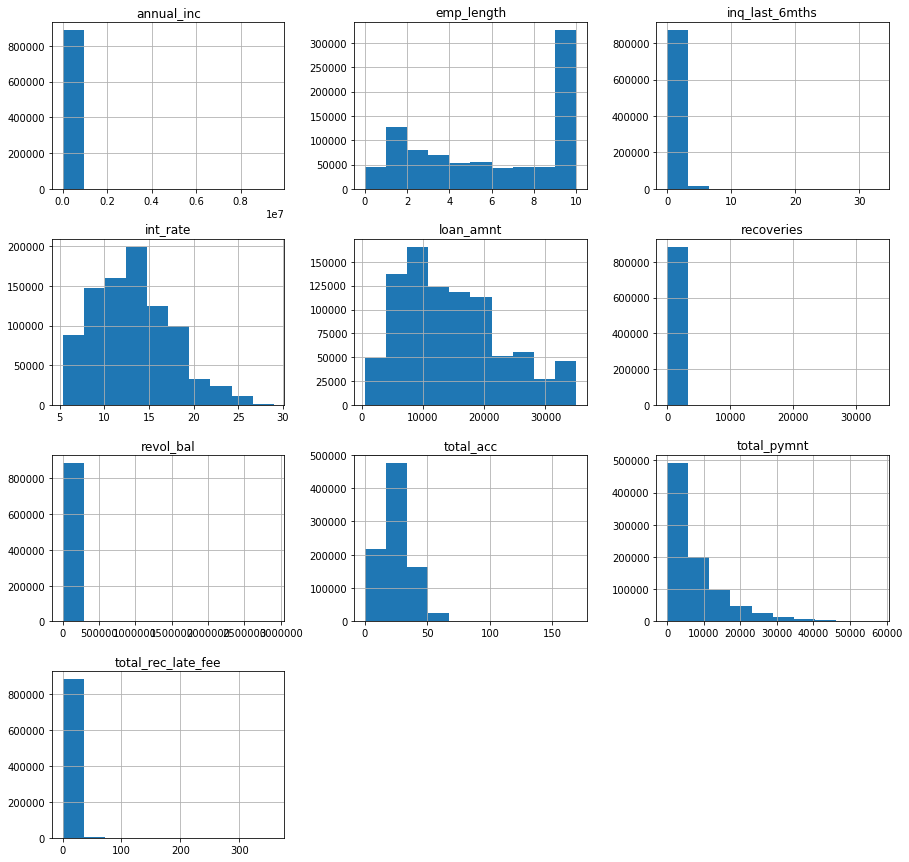

In [87]:
df.hist(figsize=(15,15))

Here I added a cap on my annual income. As without cap, there were too many outliers. 

In [88]:
df['annual_inc'].describe()

count    8.873790e+05
mean     7.502759e+04
std      6.469815e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [89]:
df_cap=df.query("annual_inc<=8.e+04")

C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


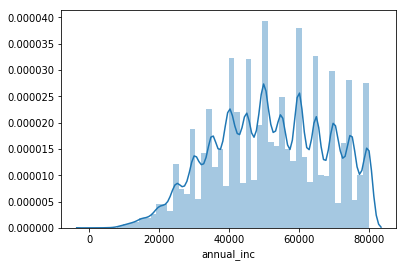

In [90]:
x = np.random.normal(size=100)
sns.distplot(df_cap.annual_inc)

#### 2.Relation betweem Employment length and Loan Status

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

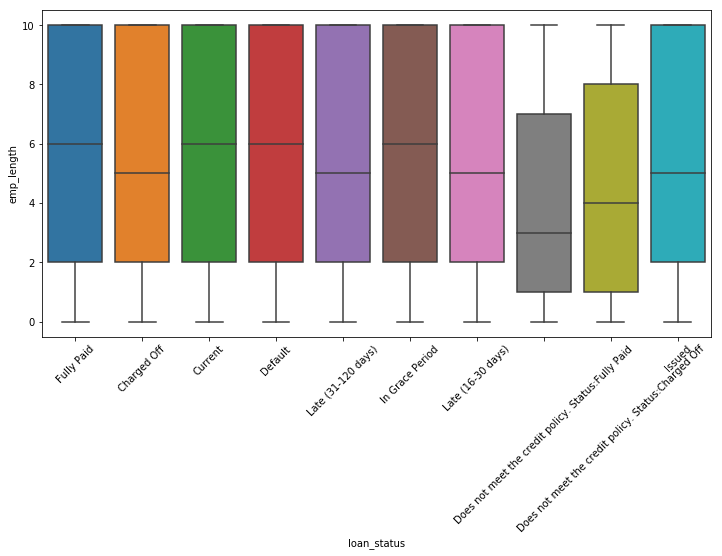

In [91]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'loan_status', y = 'emp_length',  data = df)
plt.xticks(rotation=45)

We infer from the above figure that employee length does not really have an impact on the loan_status

#### 3. Relation betweem Annual Income and Loan Status

Here I added a cap on my annual income. As without cap, there were too many outliers. 

In [92]:
df['annual_inc'].describe()
df_cap=df.query("annual_inc<=8.e+04")

#### Case when the annual income is not capped. Most of the outliers are seen without understanding the pltos

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

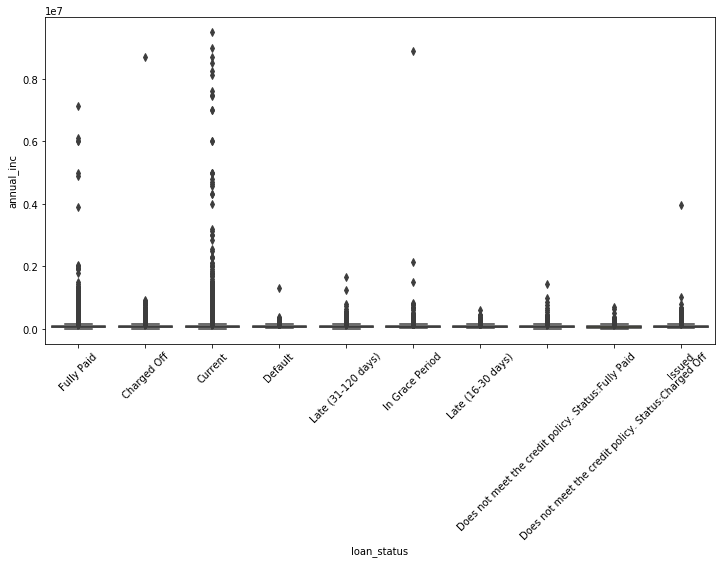

In [93]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'loan_status', y = 'annual_inc',  data = df)
plt.xticks(rotation=45)

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

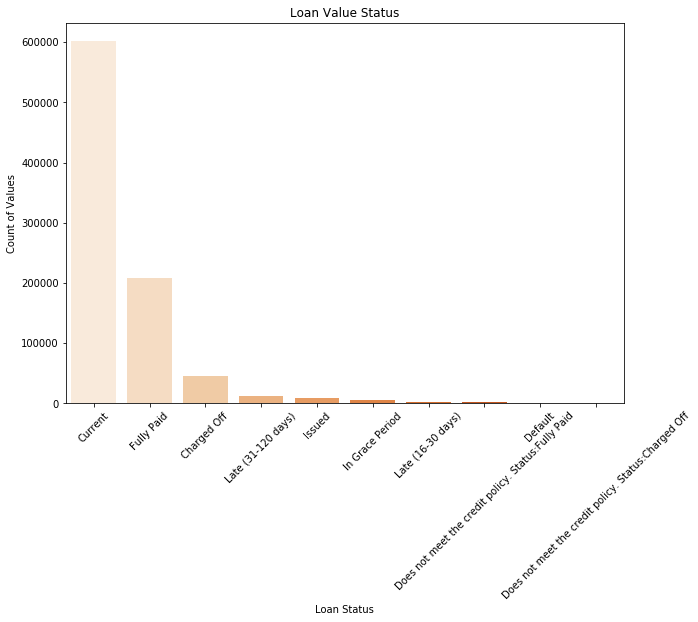

In [94]:
plt.figure(figsize=(10,7))
loan_status=df['loan_status'].value_counts()
sns.barplot(loan_status.index,loan_status,palette='Oranges')
plt.xlabel('Loan Status')
plt.ylabel('Count of Values')
plt.title("Loan Value Status")
plt.xticks(rotation=45)
loan_status

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

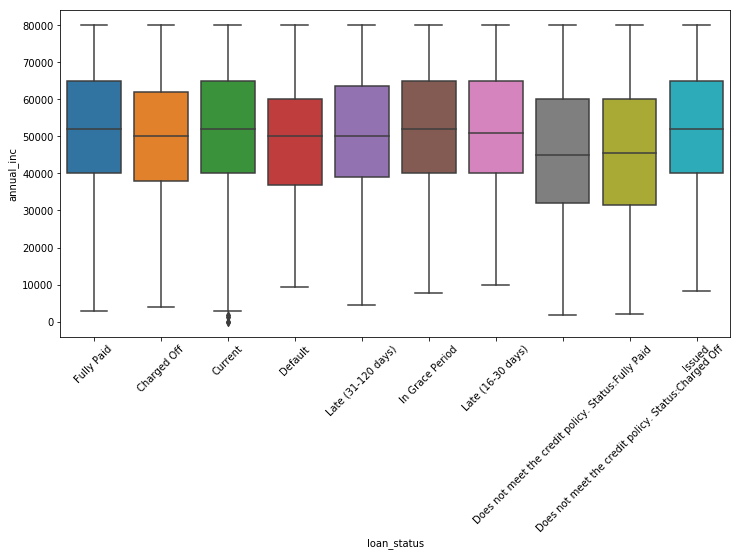

In [95]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'loan_status', y = 'annual_inc',  data = df_cap)
plt.xticks(rotation=45)

Annual incomes doesnt influence the loan status. Since loan status like "late", "in-grace period" have also similar quartile ranges like "fully paid". Infact here you see that loans are given to people who dont have any income

#### 4. Relation betweem Home Ownership and Loan Amount

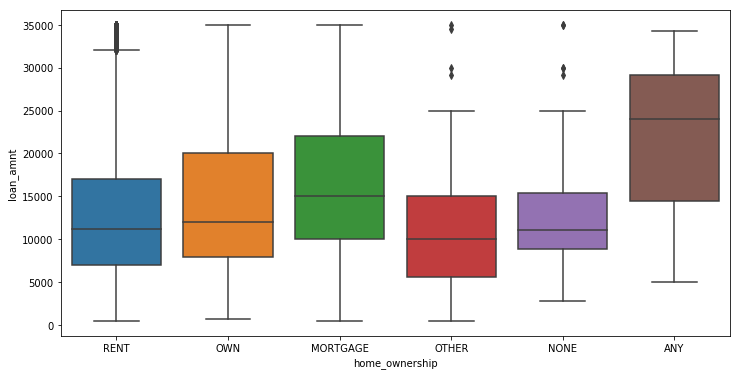

In [96]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'home_ownership', y = 'loan_amnt',  data = df)

The normal part of this data is that the ones who already own a house have taken loans with higher loan amounts.But it is striking to see that the ones under category "mortgage"

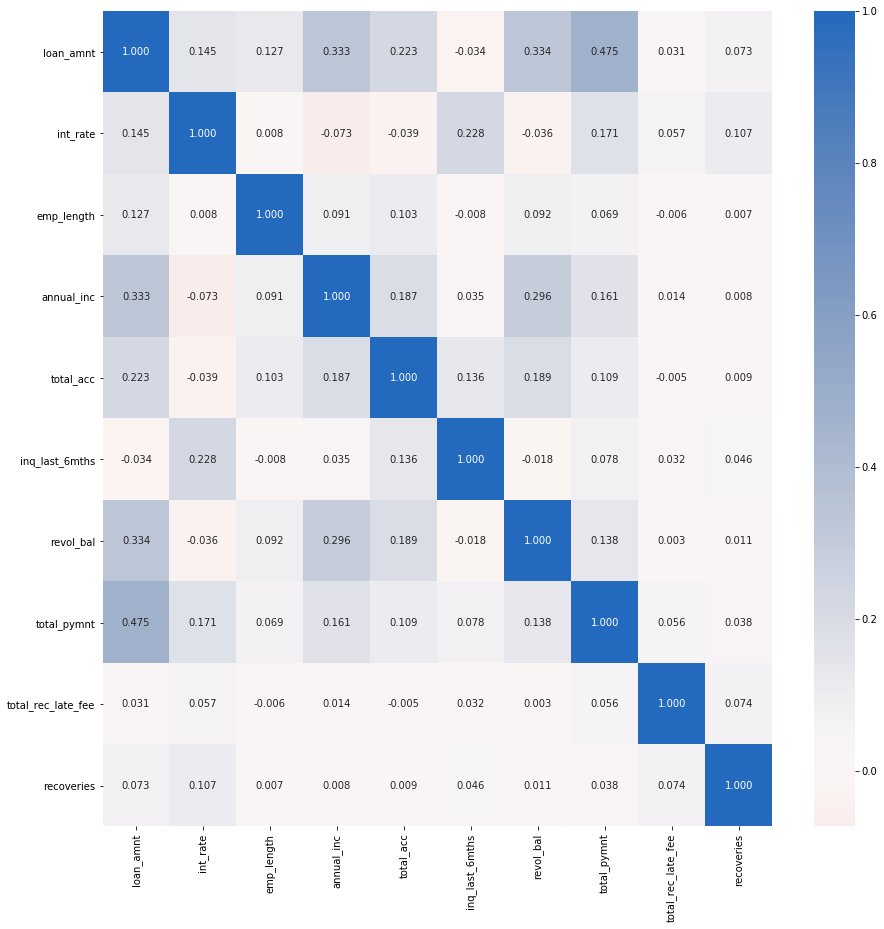

In [97]:
plt.figure(figsize = [15, 15])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

***This heatmap helps us to validate the fact that our variables that will be used in further analysis are not correlated to each other by > 65%***

From the above heatmap we can conclude following things:
    
1. Recoveries are highly related to loan status. This is intuitive as well that higher recoveries indicate that the loan will be "Charged off" 
2. total_pymnt is postively related to loan status. This means the total amount paid is a good indication to predict the loan status
3. Interest Rate is negatively related to loan status. This is also well understood higher the interest rate, lower the chances of loan being paid off in time


#### 5.Heatmap

#### 6.Checking the loan status as dependent variable

In [98]:
df_loanstatus_sliced= df[(df['loan_status']=="Fully Paid") | (df['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
df= df_loanstatus_sliced.replace({"loan_status": di})

0    207723
1     45248
Name: loan_status, dtype: int64

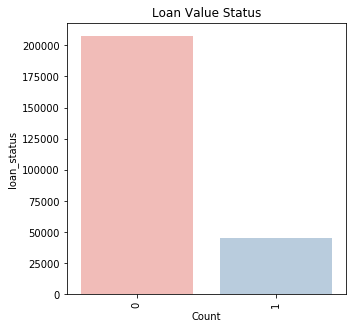

In [99]:
plt.figure(figsize=(5,5))
loan_status=df['loan_status'].value_counts()
sns.barplot(loan_status.index,loan_status,palette='Pastel1')
plt.xlabel('Count')
plt.title("Loan Value Status")
plt.xticks(rotation=90)
loan_status

We have an imbalance of data here..where the number of 0's outnumber the 1's. the majority class dominates over the minority class, causing the machine learning classifier to be more biased to the majority class. 

In [100]:
df['loan_status'].value_counts()
print("Current shape of dataset :",df.shape)
df.head(3)

Current shape of dataset : (252971, 13)


,grade,loan_status,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,total_acc,inq_last_6mths,revol_bal,total_pymnt,total_rec_late_fee,recoveries
0,B,0,5000,10.65,10,RENT,24000.0,9.0,1.0,13648.0,5861.071414,0.0,0.00
1,C,1,2500,15.27,1,RENT,30000.0,4.0,5.0,1687.0,1008.710000,0.0,117.08
2,C,0,2400,15.96,10,RENT,12252.0,10.0,2.0,2956.0,3003.653644,0.0,0.00


In [101]:
df.shape

(252971, 13)

<a id='predictive'></a>
### 4)Building Predictive Models
We try to explore the data and see what relations we find among different variables


1.Using Box Cox Transformation

2.One-Hot Encoding

3.Separating the "X" and "y"

4.Splitting the data using scikitlearn's train_test_split and using 70% data for training and 30% for testing

5.Using SMOTE Technique to remove problem of imbalance data

6.Defining the confusion matrix

7.Building Models

#### 1.Using Box Cox Transformation

We use Box-Cox Transformation inorder to transform the numerical variables into a normal shape


In [102]:
numerical = df.columns[df.dtypes == {'float64','int64'}]
for i in numerical:
    if df[i].min() > 0:
        transformed, lamb = boxcox(df.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df.loc[df[i].notnull(), i] = transformed

In [103]:
df.head(3)

,grade,loan_status,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,total_acc,inq_last_6mths,revol_bal,total_pymnt,total_rec_late_fee,recoveries
0,B,0,5000,10.65,10,RENT,24000.0,9.0,1.0,13648.0,5861.071414,0.0,0.00
1,C,1,2500,15.27,1,RENT,30000.0,4.0,5.0,1687.0,1008.710000,0.0,117.08
2,C,0,2400,15.96,10,RENT,12252.0,10.0,2.0,2956.0,3003.653644,0.0,0.00


#### 2.One-Hot Encoding

We use one-hot encoding as it a very straight forward one-step procedure to get the dummy variables for categorical features.


In [104]:
df_string = df.select_dtypes(include ='object') 
dummy_grade=pd.get_dummies(df["grade"], prefix="grade")
dummy_ownership=pd.get_dummies(df["home_ownership"], prefix="ownership")
df=df.join(dummy_grade.iloc[:,:])
df=df.join(dummy_ownership.iloc[:,:])
df.drop(columns={'grade','home_ownership'},inplace=True )


In [105]:
df[['grade_A','grade_B','grade_C']].head(3)

,grade_A,grade_B,grade_C
0,0,1,0
1,0,0,1
2,0,0,1


#### 3. Separating the "X" and "y" 

In [106]:
X = df.iloc[:, df.columns != "loan_status"]
y = df["loan_status"]
X_dup = X.copy()
df.shape

(252971, 24)

#### 4.Splitting the data using scikitlearn's train_test_split and using 70% data for training and 30% for testing

In [107]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)
Y_train.value_counts()


0    145406
1     31673
Name: loan_status, dtype: int64

In [108]:
X.shape

(252971, 23)

Verifying the data is split

In [109]:
print("X_train is {} ,X_test is {} ,Y_train is {} ,Y_test is {} ".format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape))

X_train is (177079, 23) ,X_test is (75892, 23) ,Y_train is (177079,) ,Y_test is (75892,) 


#### 5. Using SMOTE Technique to remove problem of imbalance data
SMOTE technique generates synthetic data for the minority sample and makes it equal to the majority sample. 

Now you see. the value of 0's and 1's is the same

In [110]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
np.bincount(Y_train_res)

array([145406, 145406], dtype=int64)

#### 6.Defining the confusion matrix
Confusion matrix is a good metric to see the four parameters:
1. True Positive
2. False Positive
3. True Negative
4. False Negative

In [111]:
def CMatrix(cm):
    fig, axes = plt.subplots(figsize=(8,6))
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    ax.axis('equal')

### 7. Building Models

#### A. Logistic Regression

Accuracy: 0.988154219153534


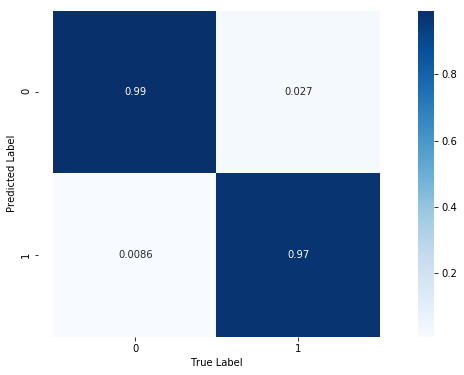

In [112]:

logistic_regression = LogisticRegression(C=1, solver = 'liblinear')
logistic_regression.fit(X_train_res, Y_train_res)
Y_pred_test = logistic_regression.predict(X_test)
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred=Y_pred_test))

#### B. Decision Trees

Accuracy: 0.9923180308859959


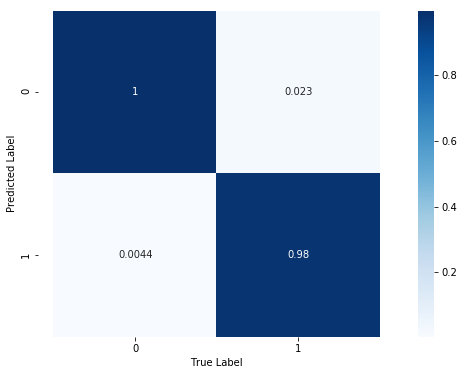

In [113]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)
class_tree.fit(X_train_res, Y_train_res)
Y_pred_test = class_tree.predict(X_test)
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred=Y_pred_test))

#### C. Naive Bayes Classifier

Accuracy: 0.9147736256785959


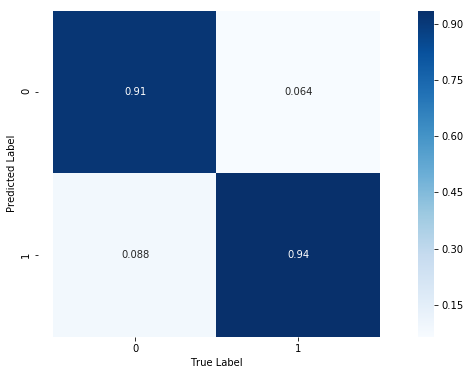

In [114]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train_res, Y_train_res)
Y_pred_test = NBC.predict(X_test)
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred=Y_pred_test))

#### D. RandomForestClassifier

In [115]:
X_dup.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'total_acc',
       'inq_last_6mths', 'revol_bal', 'total_pymnt', 'total_rec_late_fee',
       'recoveries', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'ownership_ANY', 'ownership_MORTGAGE',
       'ownership_NONE', 'ownership_OTHER', 'ownership_OWN', 'ownership_RENT'],
      dtype='object')

Accuracy: 0.9884572813998841


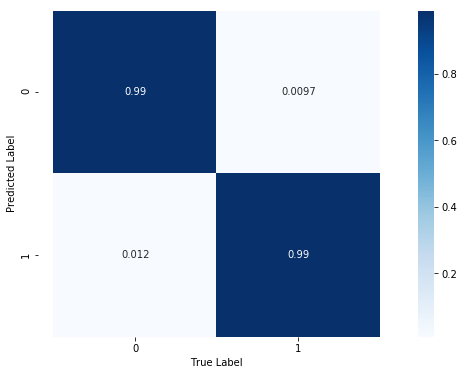

In [116]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_res, Y_train_res)
Y_pred_test = clf.predict(X_test)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
#clf.feature_importances_
list(df.columns)
feature_imp = pd.Series(clf.feature_importances_,index=X_dup.columns).sort_values(ascending=False)
feature_imp
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred=Y_pred_test))

['loan_amnt' 'int_rate' 'emp_length' 'annual_inc' 'total_acc'
 'inq_last_6mths' 'revol_bal' 'total_pymnt' 'total_rec_late_fee'
 'recoveries' 'grade_A' 'grade_B' 'grade_C' 'grade_D' 'grade_E' 'grade_F'
 'grade_G' 'ownership_ANY' 'ownership_MORTGAGE' 'ownership_NONE'
 'ownership_OTHER' 'ownership_OWN' 'ownership_RENT']


Text(0,0.5,'Normalized Gini Importance')

<Figure size 1080x720 with 0 Axes>

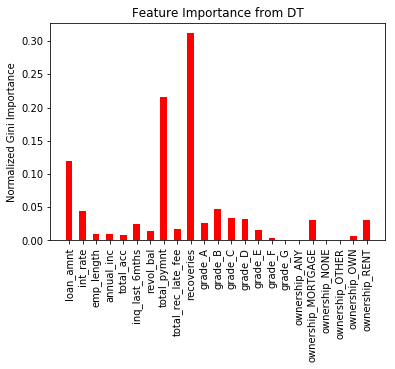

In [117]:
plt.figure(figsize = [15, 10])
fig, ax = plt.subplots()
width=0.5
features=X_dup.columns
print(X_dup.columns.values)
ax.bar(features, clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(X_dup.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

In [118]:

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9884572813998841


#### Computing cross-validated metrics

In [119]:
models = {'NB': GaussianNB(),
          'DT': DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10),
          'LR': LogisticRegression(C=1, solver = 'liblinear'),
          'RF': RandomForestClassifier(n_estimators=100)}
unbalset = {}
print("Reached here")
for i in models.keys():
    print(i)
    scores = cross_val_score(models[i], X_train_res,
                                    Y_train_res, cv=3)
    unbalset[i] = scores
print("Exiting")

Reached here
NB
DT
LR
RF
Exiting


In [120]:
print(unbalset)

{'NB': array([0.7989746 , 0.8397223 , 0.83972931]), 'DT': array([0.98211228, 0.99568797, 0.99565693]), 'LR': array([0.98055458, 0.98835338, 0.98795081]), 'RF': array([0.94645031, 0.99849388, 0.99873112])}


#### Computing the ROC curves for the models and finding the true positive and false positive

In [121]:
def createROC(models, X, y, Xte, yte):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X, y)
        fp, tp, threshold = roc_curve(yte, models[i].predict_proba(Xte)[:,1]) ##roc_curve function
        #print("FP is:{} and TP is :{}".format(fp,tp))
        true_p.append(tp)
        false_p.append(fp)
    return true_p, false_p##returning the true postive and false positive


In [122]:
tp_unbalset, fp_unbalset = createROC(models, X_train_res , Y_train_res, X_test, Y_test)

(0, 1)

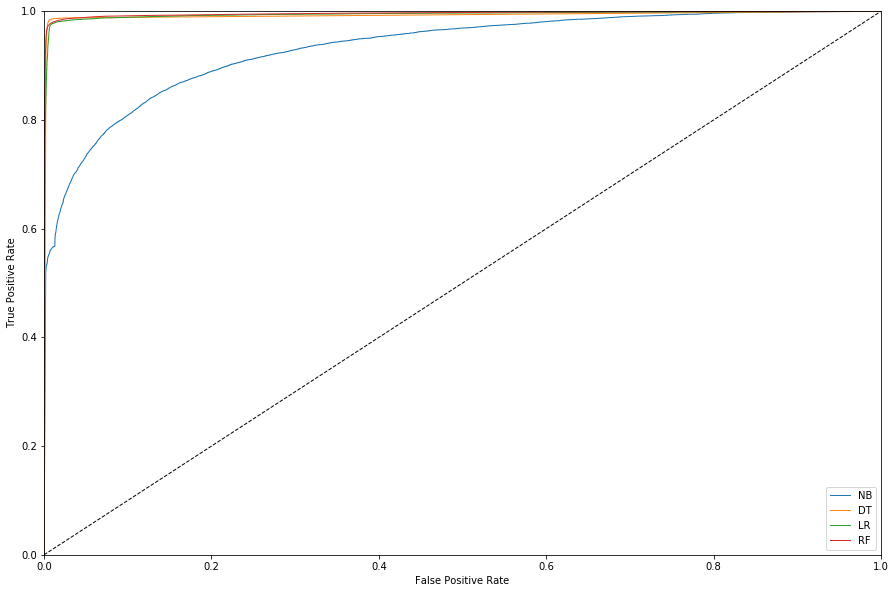

In [123]:
plt.figure(figsize = [15, 10])
for i in range(0, len(tp_unbalset)):
      plt.plot(fp_unbalset[i], tp_unbalset[i], lw=1)

plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.legend(models.keys())
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)